In [69]:
from tslearn.utils import to_time_series_dataset
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [11]:
with open('data/interfusion/processed/omi-1_train.pkl', 'rb') as f:
    data = pickle.load(f)

In [54]:
anomalies_omi1 = [(760, 765),(1064, 1298),(2758, 2772),(2874, 2885),(3012, 3025),(3160, 3305),(3626, 3638)]

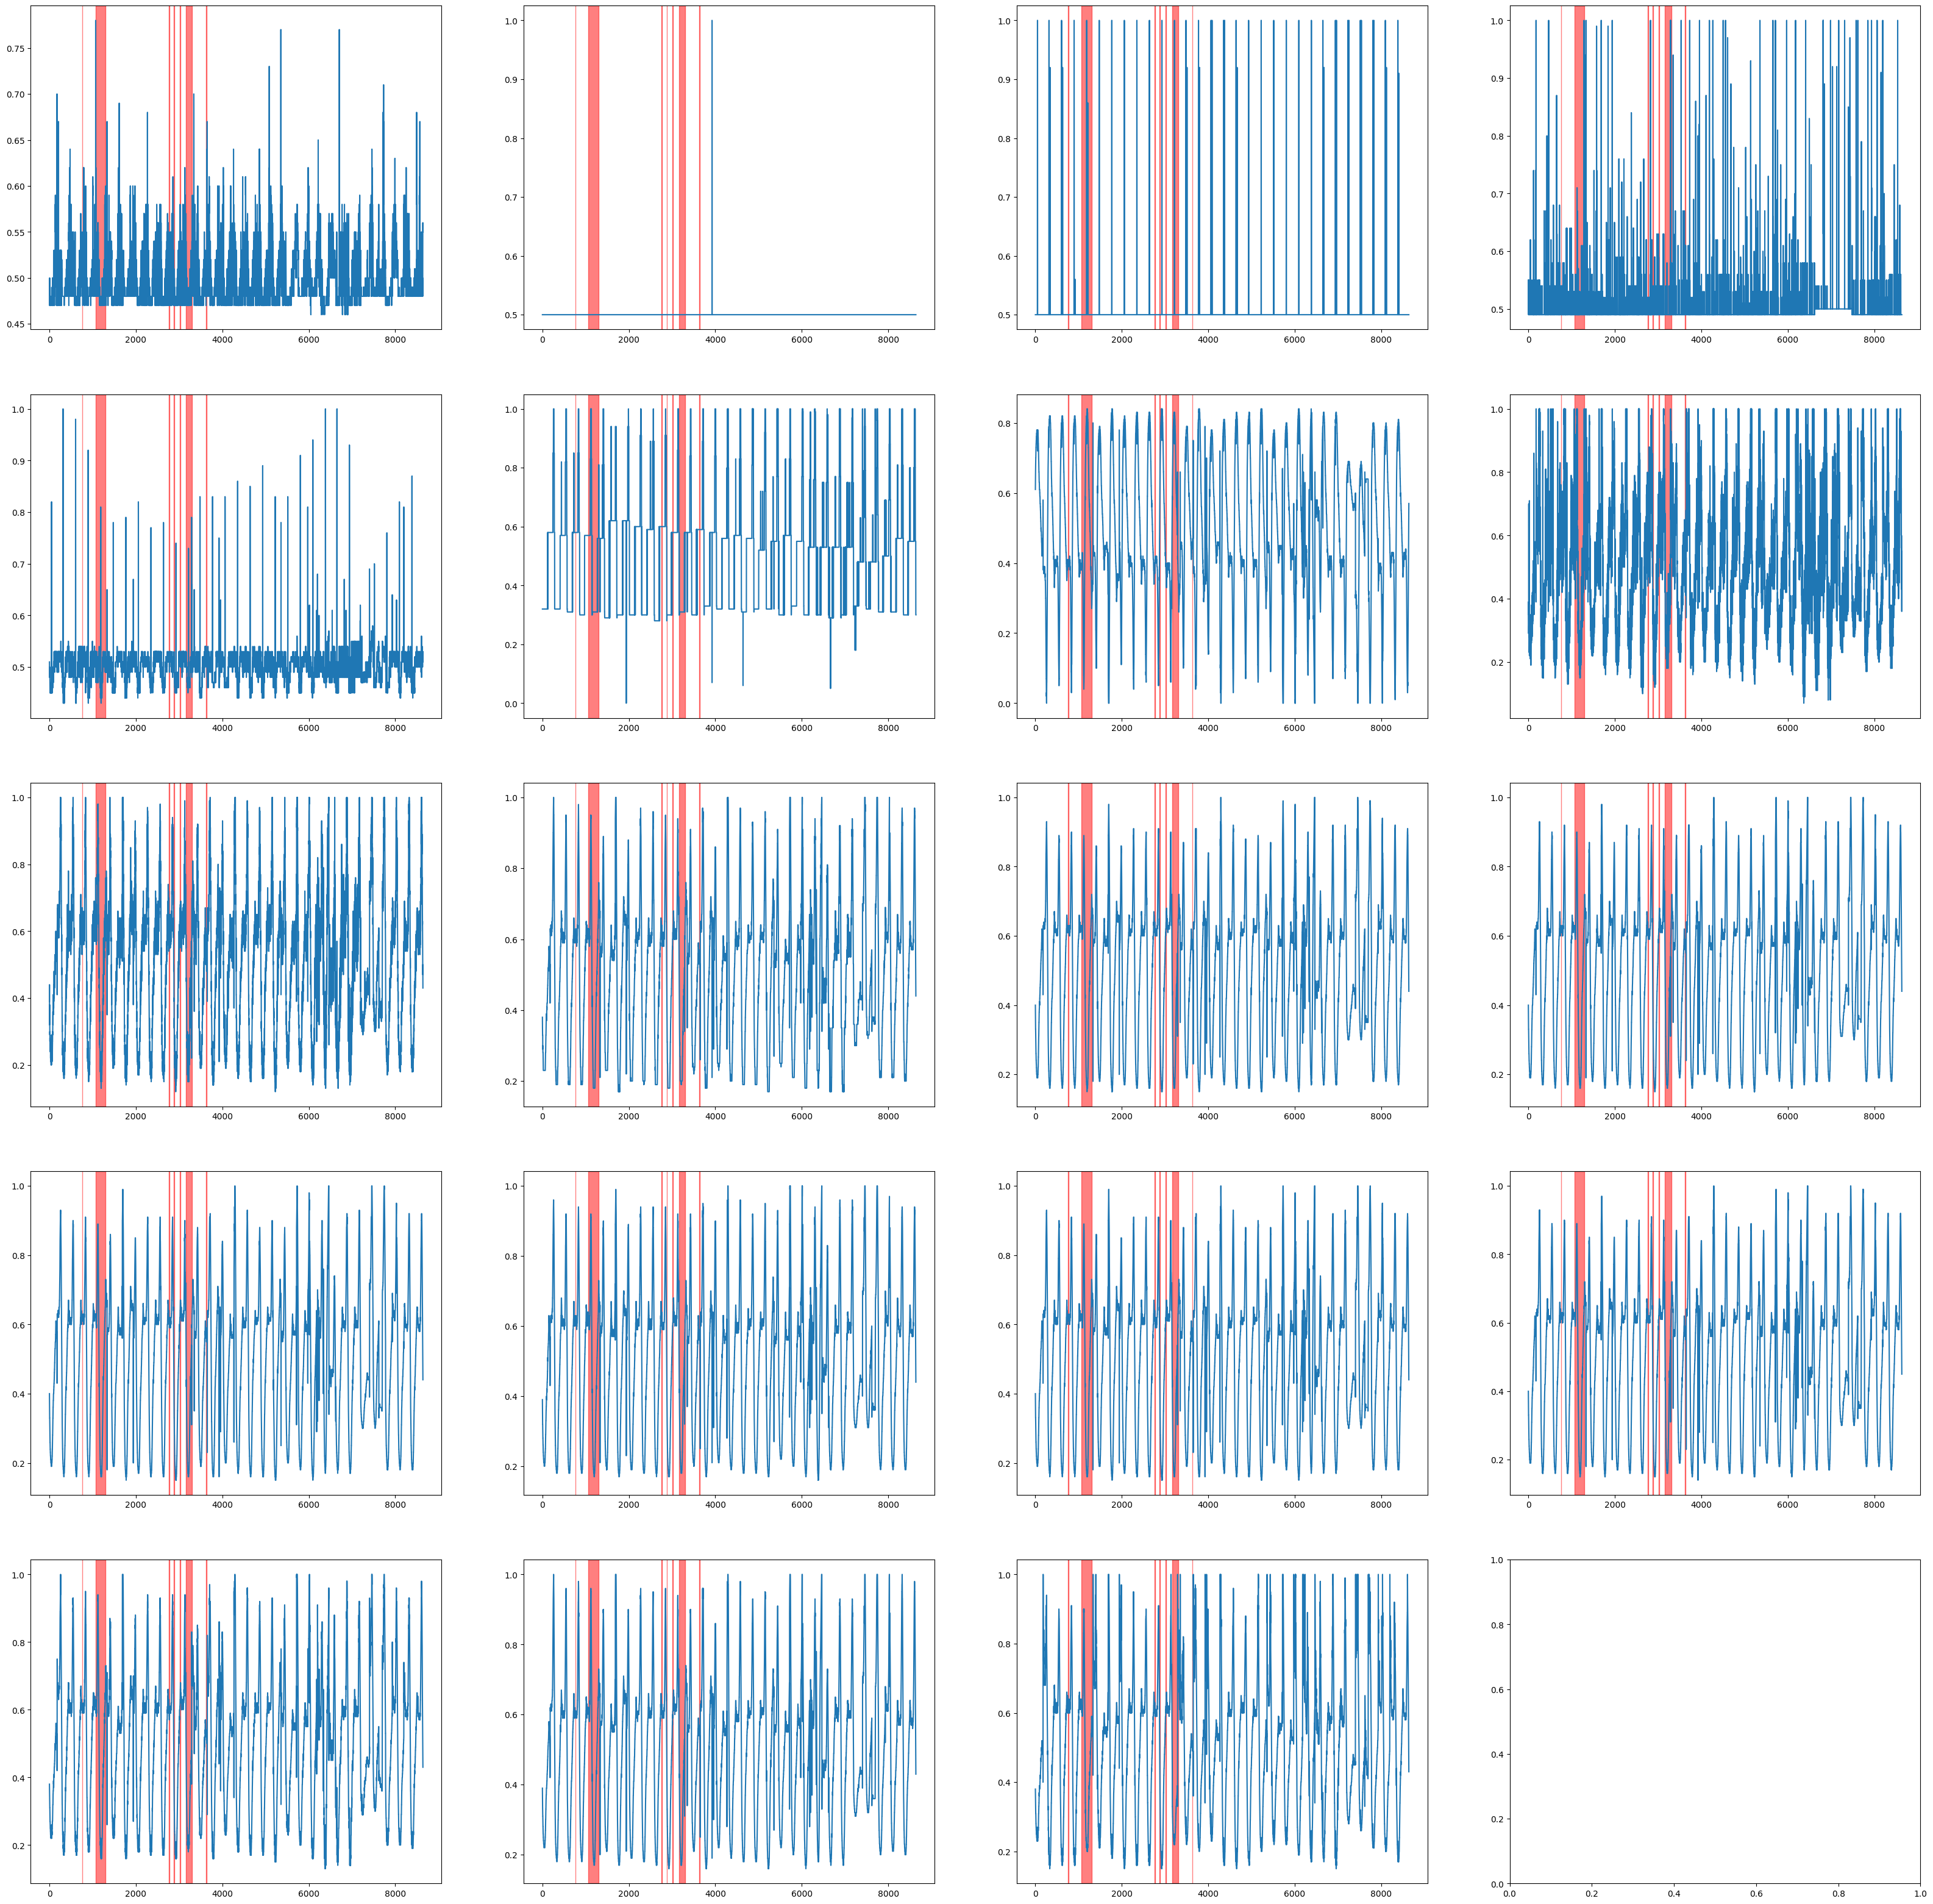

In [56]:
rows = int(np.ceil(np.sqrt(len(data[0]))))
cols = int(np.floor(np.sqrt(len(data[0]))))
fig, axs = plt.subplots(rows, cols, figsize = (40,40))

for i in range(rows):
    for j in range(cols):
        if i*cols+j+1>len(data[0]): # pass the others that we can't fill
            continue
        axs[i, j].plot(data[:,i*cols+j])
        for anomaly in anomalies_omi1:
            axs[i, j].axvspan(anomaly[0], anomaly[1], color='red', alpha=0.5)

plt.show()

In [57]:
dataset = [data[:, i] for i in range(len(data[0]))]

In [80]:
# helper function
def create_dataset(X, y, time_steps=1):
    a, b = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        a.append(v)
        b.append(y[i + time_steps])
    return np.array(a), np.array(b)

In [86]:
n_steps = 36
# reshape to 3D [n_samples, n_steps, n_features]
X_train, y_train = create_dataset(dataset[0], dataset[0], n_steps)
print('X_train shape:', X_train.shape)

X_train shape: (8604, 36)


In [70]:
# ts_dataset = timeseries_dataset_from_array(dataset[0], dataset[0], sequence_length=10, sequence_stride=5)

In [75]:
# list(ts_dataset.as_numpy_iterator())